# generate lc for agn with flare

In [1]:
import sys
import os

import importlib
import simulations

importlib.reload(simulations)

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))

In [80]:
from simulations import SimulateFlaringAGN

simulator = SimulateFlaringAGN()

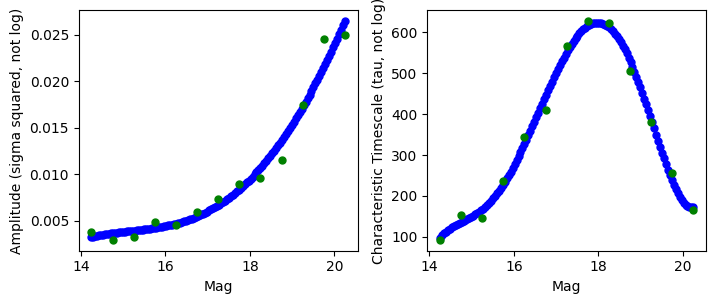

In [50]:
# realistic input values for DRW parameters based on observational data in Graham 2017

agn_params = simulator.get_agn_drw_params(num_agn_interpolate=130, plot=True)
agn_mags = sorted(list(set([x[0] for x in agn_params])))

In [51]:
# experiment number corresponds to directory name where simulated lightcurves are saved
# after saving simulations, manually add to this log
# total # sim / # param combos will give the number simulated for a set of values

simulator.show_sim_table()

|   Exp. |   Total # Sim. |   # Param Combos. | AGN Characteristics                          | Flare Characteristics                                                                                       | Data Format                                                                                                                                                                                                                                                     |
|-------:|---------------:|------------------:|:---------------------------------------------|:------------------------------------------------------------------------------------------------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|      0 |           1300 |               130 | 130 parameter combos inter

In [110]:
# example: code to save exp 2

simulator = SimulateFlaringAGN(total_num_sim=1300, verbose=True)
mags, jds, flare_jd = simulator.simulate(
    num_flares_interpolate=10,
    flare_mag=[0.1, 1.0],
    flare_rise=30,
    flare_decay=50,
    save_filename="experiment_2_example",
)

getting 13 agn parameter combinations
duplicating each agn 100 times
getting 1300 total agn
getting 10 unique flares
getting 10 sequential duplicates of each flare
repeating full flare sequence 13 times


# detrending

In [ ]:
# open example lightcurve and plot

In [ ]:
# detrend and plot those results

In [ ]:
# do this for LITD, and for examples with injected flares. do the flares get detrended?

# rolling window stats

In [1]:
from simulations import RollingWindow

exp0_path = "../data/simulated_agn/experiment0.npz"
exp1_path = "../data/simulated_agn/experiment1.npz"
exp2_path = "../data/simulated_agn/experiment2.npz"
exp3_path = "../data/simulated_agn/experiment3.npz"

In [172]:
# compute and save rolling window stats for each experiment
import json

exp0stats = RollingWindow(exp0_path)
exp0_rolling_window_stats50_25 = exp0stats.get_rolling_window_stats()

exp1stats = RollingWindow(exp1_path)
exp1_rolling_window_stats50_25 = exp1stats.get_rolling_window_stats()

exp2stats = RollingWindow(exp2_path)
exp2_rolling_window_stats50_25 = exp2stats.get_rolling_window_stats()

exp3stats = RollingWindow(exp3_path)
exp3_rolling_window_stats50_25 = exp3stats.get_rolling_window_stats()

all_stats = [
    exp0_rolling_window_stats50_25,
    exp1_rolling_window_stats50_25,
    exp2_rolling_window_stats50_25,
    exp3_rolling_window_stats50_25,
]

filename = None  # input filename
with open(f"../data/simulated_agn/{filename}", "w") as file:
    json.dump(all_stats, file)

In [2]:
# SKIP TO HERE: open saved stats

import json

with open("../data/simulated_agn/stats_50_25.json", "r") as file:
    all_stats = json.load(file)

exp0_rolling_window_stats50_25 = all_stats[0]
exp1_rolling_window_stats50_25 = all_stats[1]
exp2_rolling_window_stats50_25 = all_stats[2]
exp3_rolling_window_stats50_25 = all_stats[3]

# rolling window heuristic

In [3]:
from simulations import RollingWindowHeuristic

exp0_flares = RollingWindowHeuristic(
    exp0_rolling_window_stats50_25, percent=0.7, k_mad=3
).medians_test()
exp1_flares = RollingWindowHeuristic(
    exp1_rolling_window_stats50_25, percent=0.7, k_mad=3
).medians_test()
exp2_flares = RollingWindowHeuristic(
    exp2_rolling_window_stats50_25, percent=0.7, k_mad=3
).medians_test()
exp3_flares = RollingWindowHeuristic(
    exp3_rolling_window_stats50_25, percent=0.7, k_mad=3
).medians_test()

flares = [exp0_flares, exp1_flares, exp2_flares, exp3_flares]

## plot simulated lightcurves with rolling window stats

cannot access local variable 'i' where it is not associated with a value


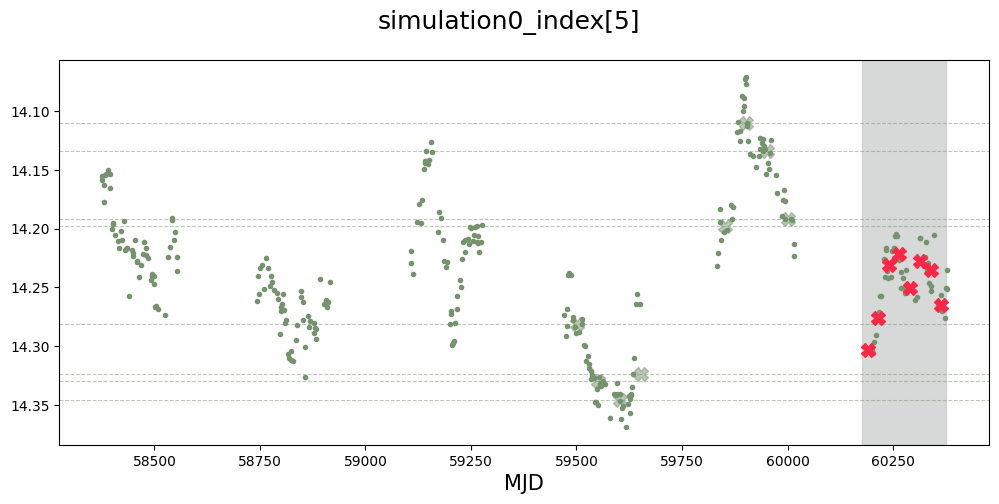

In [4]:
from plotting import Plotter

plot_index = [exp0_flares[4]]
plotter = Plotter(
    plot_index,
    "g",
    exp0_path,
    exp0_rolling_window_stats50_25,
    gw_date=2460177,
    eventid=f"simulation0_index{plot_index}",
    simulation=True,
)
plotter.show_plots()

cannot access local variable 'i' where it is not associated with a value


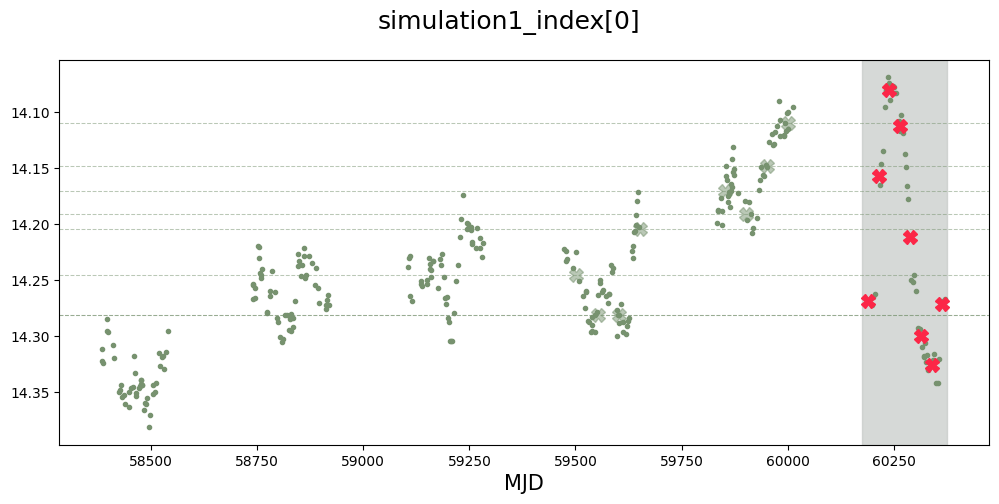

In [11]:
plot_index = [exp1_flares[0]]
plotter = Plotter(
    plot_index,
    "g",
    exp1_path,
    exp1_rolling_window_stats50_25,
    gw_date=2460177,
    eventid=f"simulation1_index{plot_index}",
    simulation=True,
)
plotter.show_plots()

cannot access local variable 'i' where it is not associated with a value


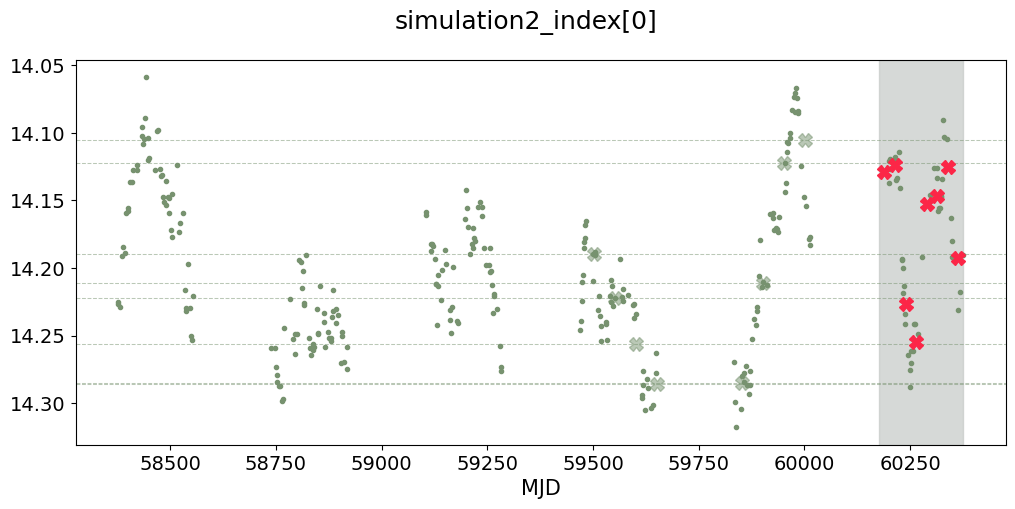

In [183]:
plot_index = [exp2_flares[0]]
plotter = Plotter(
    plot_index,
    "g",
    exp2_path,
    exp2_rolling_window_stats50_25,
    gw_date=2460177,
    eventid=f"simulation2_index{plot_index}",
    simulation=True,
)
plotter.show_plots()

cannot access local variable 'i' where it is not associated with a value


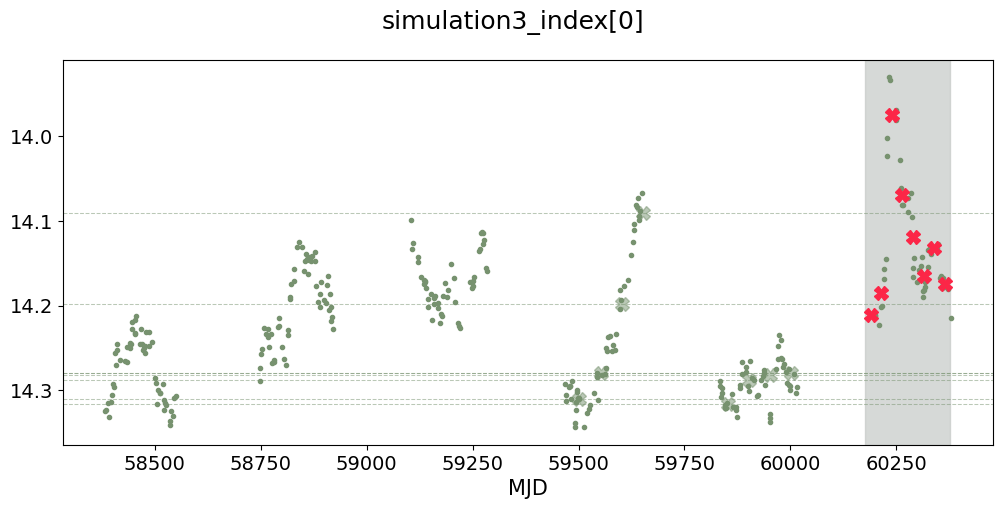

In [184]:
plot_index = [exp3_flares[0]]
plotter = Plotter(
    plot_index,
    "g",
    exp3_path,
    exp3_rolling_window_stats50_25,
    gw_date=2460177,
    eventid=f"simulation3_index{plot_index}",
    simulation=True,
)
plotter.show_plots()

# optimize heuristic

In [ ]:
# reminder on data format:

# EXP 0
# There are 130 AGN DRW parameter combos. The first 10 AGN are from the first combo, next 10 are from the second combo, up to the 130th combo

# EXP 1
# AGN same as above. Flares are all the same for each AGN, apart from random start times within a window

# EXP 2
# first 100 AGN are all simulated from the first DRW parameter combo, next 100 are from the second combo, up to the 13th combo.
# first 10 flares have first flare mag, next 10 have second flare mag, up to 10th flare mag, then start over for the new AGN

# EXP 3
# AGN same as above.
# first 10 flares have first rise time, next 10 have second rise time, up to 10th rise_time, then start over for the new AGN

In [4]:
from simulations import RollingWindowHeuristic

perc = 0.9
k = 5

exp0_flares = RollingWindowHeuristic(
    exp0_rolling_window_stats50_25, percent=perc, k_mad=k
).medians_test()
exp1_flares = RollingWindowHeuristic(
    exp1_rolling_window_stats50_25, percent=perc, k_mad=k
).medians_test()
exp2_flares = RollingWindowHeuristic(
    exp2_rolling_window_stats50_25, percent=perc, k_mad=k
).medians_test()
exp3_flares = RollingWindowHeuristic(
    exp3_rolling_window_stats50_25, percent=perc, k_mad=k
).medians_test()

flares = [exp0_flares, exp1_flares, exp2_flares, exp3_flares]

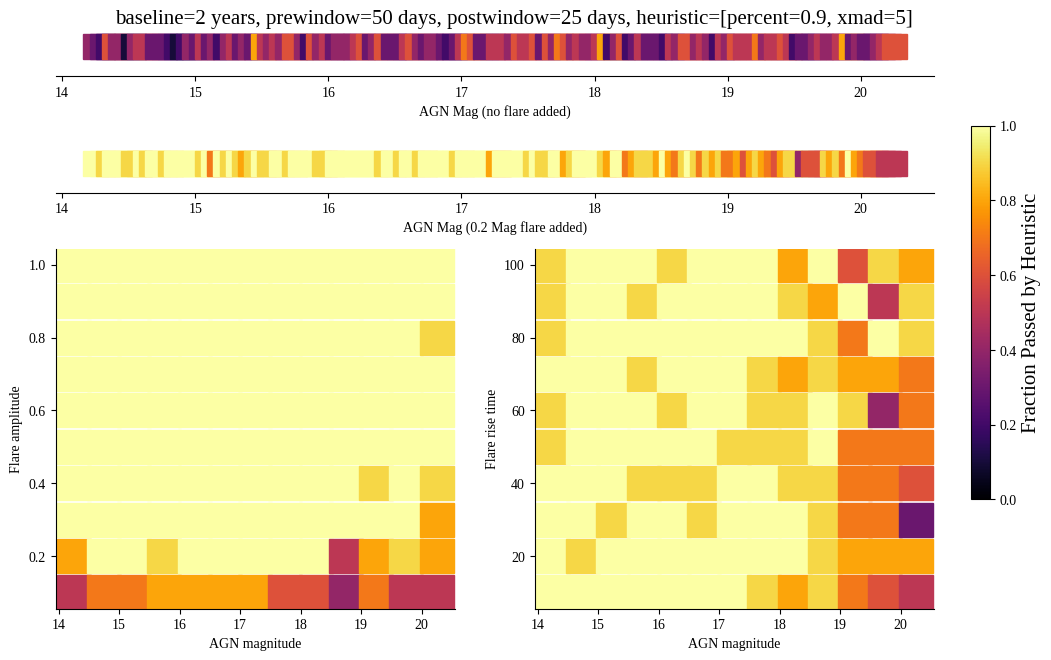

In [5]:
from simulations import PlotSimResults

title = f"baseline=2 years, prewindow=50 days, postwindow=25 days, heuristic=[percent={perc}, xmad={k}]"
simplotter = PlotSimResults(flares, title)
simplotter.plot_results()

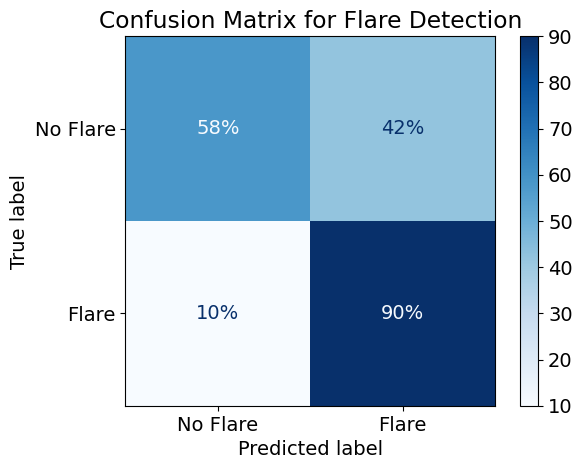

In [149]:
simplotter.plot_confusion_matrix()

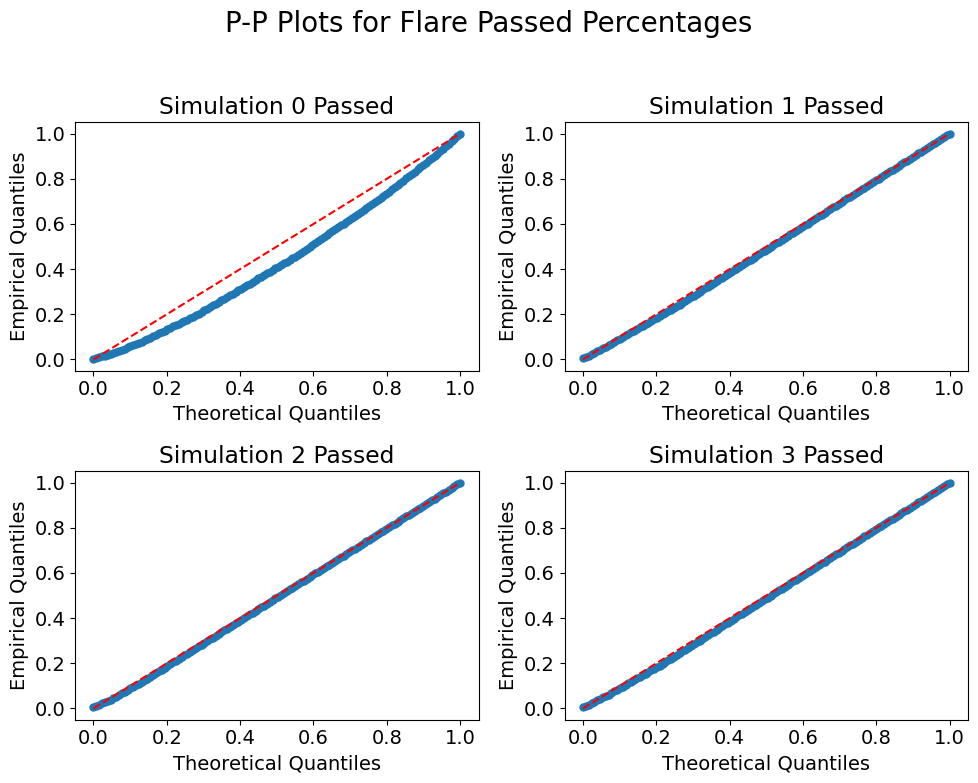

In [99]:
simplotter.plot_pp()

In [ ]:
# plot coverage contours, ie for AGN amplitude vs characteristic time scale ?
# 130 AGN DRW parameter combos. The first 10 AGN are from the first combo, next 10 are from the second combo, up to the 130th combo



In [ ]:
# maybe show a grid for flare rise time vs flare amplitude



# test on truncated lightcurve

when we are working in the 200 day post GW window

when num=1 with 25 day windows post GW, this is showing us our peformance when we have 25 days post GW

In [27]:
def get_flares_simulation_experiments(perc=0.6, k=3, num=1):
    exp0_flares = RollingWindowHeuristic(
        exp0_rolling_window_stats50_25, percent=perc, k_mad=k, num_gw_windows=num
    ).medians_test()
    exp1_flares = RollingWindowHeuristic(
        exp1_rolling_window_stats50_25, percent=perc, k_mad=k, num_gw_windows=num
    ).medians_test()
    exp2_flares = RollingWindowHeuristic(
        exp2_rolling_window_stats50_25, percent=perc, k_mad=k, num_gw_windows=num
    ).medians_test()
    exp3_flares = RollingWindowHeuristic(
        exp3_rolling_window_stats50_25, percent=perc, k_mad=k, num_gw_windows=num
    ).medians_test()

    flares = [exp0_flares, exp1_flares, exp2_flares, exp3_flares]
    return flares


limited_post_gw_experiment = [
    get_flares_simulation_experiments(num=number_windows)
    for number_windows in [1, 2, 3, 4, 6, 8]
]

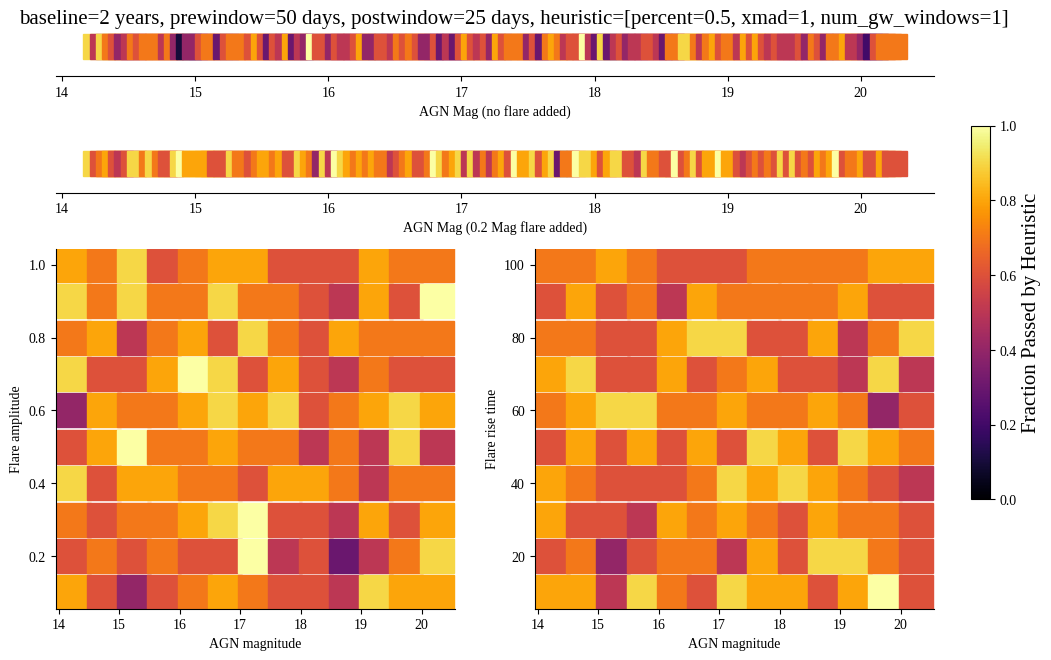

In [4]:
from simulations import PlotSimResults

perc = 0.5
k = 1
num = 1
flares = limited_post_gw_experiment[0]

title = f"baseline=2 years, prewindow=50 days, postwindow=25 days, heuristic=[percent={perc}, xmad={k}, num_gw_windows={num}]"
simplotter = PlotSimResults(flares, title)
simplotter.plot_results()

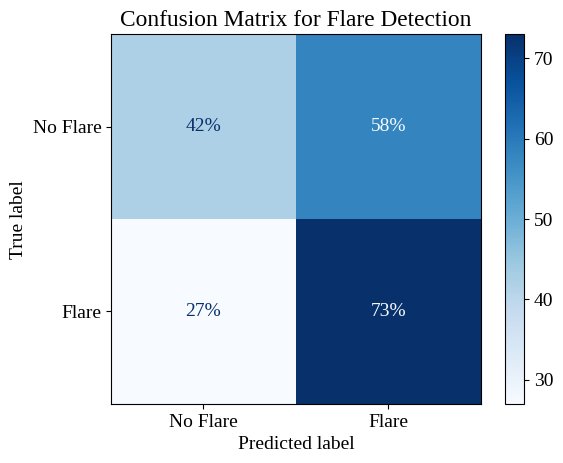

In [5]:
simplotter.plot_confusion_matrix()

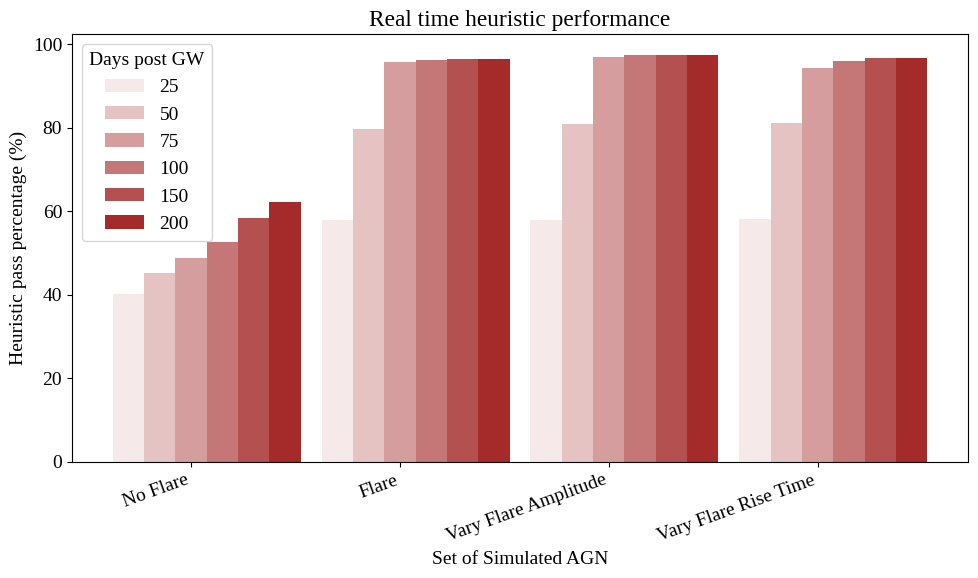

In [28]:
from simulations import PlotTruncatedLCExperiment

truncsimplotter = PlotTruncatedLCExperiment(limited_post_gw_experiment)
truncsimplotter.plot_truncated_lc_experiment()

# optimize window size

In [29]:
# taking just experiment 0 and 1, get grid of window sizes
import numpy as np
import itertools
from simulations import RollingWindow

# exp 0
exp0_path = "../data/simulated_agn/experiment0.npz"
exp0stats = RollingWindow(exp0_path)

# exp 1
exp1_path = "../data/simulated_agn/experiment1.npz"
exp1stats = RollingWindow(exp1_path)

# window size grid
window_size_pre = np.linspace(5, 150, 6)
window_size_post = np.linspace(5, 200, 6)
combinations = itertools.product(window_size_pre, window_size_post)

print(f"window_size_pre: {window_size_pre}")
print(f"window_size_post: {window_size_post}")

window_size_pre: [  5.  34.  63.  92. 121. 150.]
window_size_post: [  5.  44.  83. 122. 161. 200.]


In [ ]:
exp0_rolling_window_stats_grid = [
    exp0stats.get_rolling_window_stats(window_size_before=pre, window_size_after=post)
    for pre, post in combinations
]

In [20]:
exp1_rolling_window_stats_grid = [
    exp1stats.get_rolling_window_stats(window_size_before=pre, window_size_after=post)
    for pre, post in combinations
]

In [21]:
# save the above
import json


all_window_stats = [exp0_rolling_window_stats_grid, exp1_rolling_window_stats_grid]

filename = None  # input filename ie 'stats_windowgrid.json'

with open(f"../data/simulated_agn/{filename}", "w") as file:
    json.dump(all_window_stats, file)

In [31]:
# SKIP TO HERE: open all_stats
# reminder on date structure: each experiment ie exp1_windowgrid has 36 items corresponding to each window size combination
# within each of those items, there are 1300 items each corresponding to an AGN
# Of those 1300, each consecutive 10 items correspond to the same AGN, so 130 AGN in total
import json

from simulations import RollingWindowHeuristic

with open("../data/simulated_agn/stats_windowgrid.json", "r") as file:
    all_stats = json.load(file)

exp0_windowgrid = all_stats[0]
exp1_windowgrid = all_stats[1]

perc = 0.6
k = 3

exp0_flares_windowgrid = [
    RollingWindowHeuristic(agn, percent=perc, k_mad=k).medians_test()
    for agn in exp0_windowgrid
]
pass_percentages_exp0 = [
    round(100 * (len(i) / len(j)))
    for i, j in zip(exp0_flares_windowgrid, exp0_windowgrid)
]

exp1_flares_windowgrid = [
    RollingWindowHeuristic(agn, percent=perc, k_mad=k).medians_test()
    for agn in exp1_windowgrid
]
pass_percentages_exp1 = [
    round(100 * (len(i) / len(j)))
    for i, j in zip(exp1_flares_windowgrid, exp1_windowgrid)
]

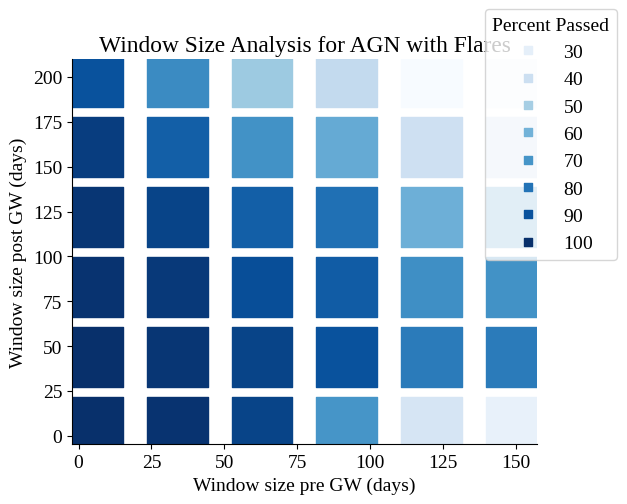

In [32]:
from simulations import PlotSimResults

PlotSimResults(title="Window Size Analysis for AGN with Flares").plot_window_grid(
    pass_percentages_exp1, window_size_pre, window_size_post
)

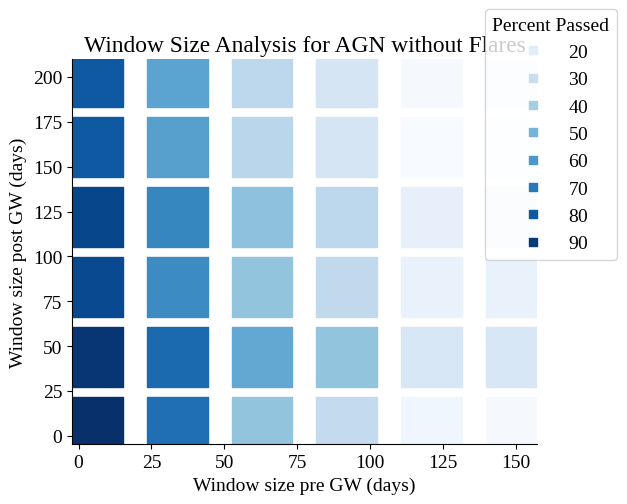

In [33]:
PlotSimResults(title="Window Size Analysis for AGN without Flares").plot_window_grid(
    pass_percentages_exp0, window_size_pre, window_size_post
)

# look at light in the dark lightcurves

In [35]:
import sys
import importlib

# Add the parent directory to the Python path
sys.path.append("../../")

# Import the module
import flares_utils.flares_utils

# Reload the module
importlib.reload(flares_utils.flares_utils)

<module 'flares_utils.flares_utils' from '/home/kira/mypy/repos/BBHBot/dev/flare_simulations/../../flares_utils/flares_utils.py'>

In [36]:
# manual bookkeeping
from astropy.time import Time
from flares_utils.flares_utils import LightcurveProcessorOriginal
from flares_utils.flares_utils import RollingWindowStats, RollingWindowHeuristic

agn_ids = [
    "J124942.30+344928.9",
    "J183412.42+365655.3",
    "J181719.94+541910.0",
    "J224333.95+760619.2",
    "J053408.41+085450.6",
    "J120437.98+500024.0",
    "J154342.46+461233.4",
]
gw_times = [
    "2019-04-03",
    "2019-04-24",
    "2019-05-14",
    "2019-05-21",
    "2019-07-31",
    "2019-08-03",
    "2019-09-09",
    "2020-02-16",
    "2020-02-20",
]
jds = [int(Time(x, format="iso").jd) for x in gw_times]

# load lightcurves
photometry_path = "../data/lightindark"
processor = LightcurveProcessorOriginal(photometry_path, jds, agn_ids)
AGN = processor.process_lightcurves()

# run heuristic

rolling_stats = [
    RollingWindowStats(
        graceid="Example AGN with Anomalous Flare",
        agn=AGN,
        path_data=None,
        observing_run=None,
        dateobs=x,
    ).get_rolling_window_stats()
    for x in jds
]
g, r, i, gr, gri = RollingWindowHeuristic(
    graceid=id,
    agn=AGN,
    rolling_stats=rolling_stats,
    path_data=None,
    percent=0.6,
    k_mad=3,
    testing=True,
    observing_run=None,
).get_flares()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

In [ ]:
# how many LITD pass my pipeline

# window_size_before=50,
# window_size_after=25,
# baseline_years=2,
# percent=0.6,
# k_mad=3,


In [ ]:
from flares_utils.flares_utils import Plotter

In [ ]:
index_to_plot = [2]

Plotter(
    index_to_plot=index_to_plot,
    color_to_plot="all",
    agn=AGN,
    rolling_stats=rolling_stats,
    graceid="Example AGN with Anomalous Flare",
    path_data=None,
    observing_run=None,
    flares_from_graceid="gr",
).show_plots()

# look at O4 event as example

In [37]:
# visually inspect for good candidates - do I see trends of junk passing I can avoid
from flares_utils.flares_utils import FlarePreprocessing
from flares_utils.flares_utils import Plotter

graceid = "S250319bu"

AGN = FlarePreprocessing(
    graceid=graceid, path_data="../../data", observing_run="O4c"
).process_for_flare()

found 23880 AGN


4211 AGN have flares in gr band(s)


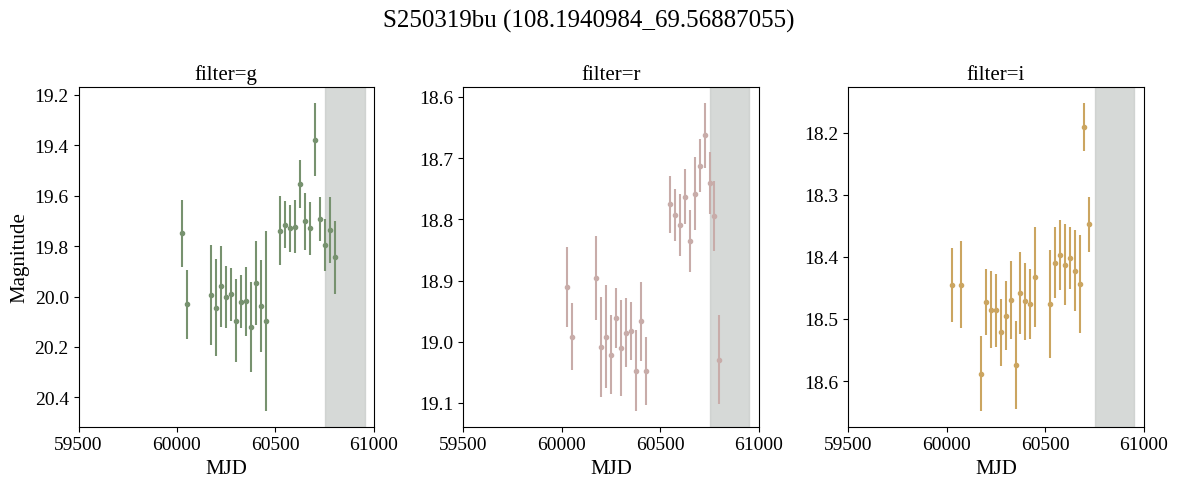

In [47]:
index_to_plot = [8]

Plotter(
    index_to_plot=index_to_plot,
    color_to_plot="all",
    agn=AGN,
    rolling_stats=None,
    graceid=graceid,
    path_data="../../data",
    observing_run="O4c",
    flares_from_graceid="gr",
).show_plots()